# Test Cascade and Parallel NAS deployed on the XEM7310 Artix-7 board using the OKAERTool

This notebook is a simple example of how to test the Cascade and Parallel NAS model deployed both on the XEM7310 Artix-7 board using the OKAERTool (deployed on the same FPGA board too). The pyOKAERTool is a Python package that provides a simple interface to interact with the OKAERTool IP block. The OKAERTool IP an open-source hardware platform that can be used to deploy and test AER based systems on the edge.

## Monitoring the CPNAS outputs
The okaertool is deployed on the Artix-7 FPGA where a stereo 64 channels Cascade and Parallel NAS are deployed. The script below initializes the OKAERTool.

In [7]:
import sys
import logging
import os
# caution: path[0] is reserved for script path (or '' in REPL)
path = os.path.join(".." , "src")
sys.path.insert(1, path)

import okaertool as okt
from pyNAVIS import *
import time

# Create a new intance of the OkaerTool class and initialize it
okaer = okt.Okaertool()
okaer.init()

# Create a new instance of the PyNAVIS class
settings = MainSettings(num_channels=64, mono_stereo=1, on_off_both=1, address_size=4, ts_tick=0.01, bin_size=500000)

05/21/25 12:18:05 PM - INFO : No bit file loaded. Ensure that the FPGA is already programmed
05/21/25 12:18:05 PM - INFO : okaertool initialized as idle


### Configure Cascade and Parallel NAS
Both NAS sensors need to be configure before testing. The configuration is done using the `set_config` method of the OKAERTool class. The configuration parameters are passed as a list of values. The parameters are:
- PDM2Spikes_DEFAULT_parameter
- I2S2Spikes_DEFAULT_parameter
- CASCADE_FILTER_DEFAULT_parameter
- PARALLEL_FILTER_DEFAULT_parameter


In [ ]:
PDM2Spikes_DEFAULT_parameter = [0x0005, 0x0006, 0x734B, 0x39C8]
I2S2Spikes_DEFAULT_parameter = [0x000F]

CASCADE_FILTER_DEFAULT_parameter = [
    	0x04, 0x77B4, 0x77B4, 0x2025, 
		0x04, 0x6B1C, 0x6B1C, 0x2025,
		0x02, 0x7303, 0x7303, 0x2025, 
		0x02, 0x66E9, 0x66E9, 0x2025, 
		0x03, 0x7AC8, 0x7AC8, 0x2025, 
		0x03, 0x6DDD, 0x6DDD, 0x2025, 
		0x04, 0x7AE1, 0x7AE1, 0x2025, 
		0x04, 0x6DF4, 0x6DF4, 0x2025, 
		0x02, 0x7610, 0x7610, 0x2025, 
		0x02, 0x69A4, 0x69A4, 0x2025, 
		0x03, 0x7E0A, 0x7E0A, 0x2025, 
		0x03, 0x70C7, 0x70C7, 0x2025, 
		0x04, 0x7E24, 0x7E24, 0x2025, 
		0x04, 0x70DF, 0x70DF, 0x2025, 
		0x02, 0x7932, 0x7932, 0x2025, 
		0x02, 0x6C72, 0x6C72, 0x2025, 
		0x02, 0x6109, 0x6109, 0x2025, 
		0x03, 0x73C5, 0x73C5, 0x2025, 
		0x03, 0x6797, 0x6797, 0x2025, 
		0x04, 0x73DD, 0x73DD, 0x2025, 
		0x02, 0x7C69, 0x7C69, 0x2025, 
		0x02, 0x6F52, 0x6F52, 0x2025, 
		0x02, 0x639C, 0x639C, 0x2025, 
		0x03, 0x76D8, 0x76D8, 0x2025, 
		0x03, 0x6A57, 0x6A57, 0x2025, 
		0x04, 0x76F1, 0x76F1, 0x2025, 
		0x02, 0x7FB6, 0x7FB6, 0x2025, 
		0x02, 0x7247, 0x7247, 0x2025, 
		0x02, 0x6641, 0x6641, 0x2025, 
		0x03, 0x79FF, 0x79FF, 0x2025, 
		0x03, 0x6D29, 0x6D29, 0x2025, 
		0x04, 0x7A19, 0x7A19, 0x2025, 
		0x04, 0x6D40, 0x6D40, 0x2025, 
		0x02, 0x754F, 0x754F, 0x2025, 
		0x02, 0x68F7, 0x68F7, 0x2025, 
		0x03, 0x7D3C, 0x7D3C, 0x2025, 
		0x03, 0x700F, 0x700F, 0x2025, 
		0x04, 0x7D56, 0x7D56, 0x2025, 
		0x04, 0x7026, 0x7026, 0x2025, 
		0x02, 0x786C, 0x786C, 0x2025, 
		0x02, 0x6BC1, 0x6BC1, 0x2025, 
		0x02, 0x606A, 0x606A, 0x2025, 
		0x03, 0x7308, 0x7308, 0x2025, 
		0x03, 0x66EE, 0x66EE, 0x2025, 
		0x04, 0x7320, 0x7320, 0x2025, 
		0x02, 0x7B9E, 0x7B9E, 0x2025, 
		0x02, 0x6E9C, 0x6E9C, 0x2025, 
		0x02, 0x62F9, 0x62F9, 0x2025, 
		0x03, 0x7615, 0x7615, 0x2025, 
		0x03, 0x69A9, 0x69A9, 0x2025, 
		0x04, 0x762E, 0x762E, 0x2025, 
		0x02, 0x7EE6, 0x7EE6, 0x2025, 
		0x02, 0x718C, 0x718C, 0x2025, 
		0x02, 0x659A, 0x659A, 0x2025, 
		0x03, 0x7937, 0x7937, 0x2025, 
		0x03, 0x6C77, 0x6C77, 0x2025, 
		0x04, 0x7951, 0x7951, 0x2025, 
		0x04, 0x6C8E, 0x6C8E, 0x2025, 
		0x02, 0x748F, 0x748F, 0x2025, 
		0x02, 0x684C, 0x684C, 0x2025, 
		0x03, 0x7C6F, 0x7C6F, 0x2025, 
		0x03, 0x6F57, 0x6F57, 0x2025,
		0x04, 0x7C89, 0x7C89, 0x2025, 
		0x04, 0x6F6F, 0x6F6F, 0x2025, 
		0x02, 0x77A7, 0x77A7, 0x2025]

PARALLEL_FILTER_DEFAULT_parameter = [
    	0x00, 0x7FFF, 0x1012, 0x5E5C, 
		0x00, 0x7FFF, 0x1012, 0x546E, 
		0x00, 0x7FFF, 0x1012, 0x4B8C,
		0x00, 0x7FFF, 0x1012, 0x439A, 
		0x00, 0x7FFF, 0x1012, 0x78FB, 
		0x00, 0x7FFF, 0x1012, 0x6C41, 
		0x00, 0x7FFF, 0x1012, 0x60DD,
		0x00, 0x7FFF, 0x1012, 0x56AC, 
		0x00, 0x7FFF, 0x1012, 0x4D8E, 
		0x00, 0x7FFF, 0x1012, 0x4565, 
		0x00, 0x7FFF, 0x1012, 0x7C31,
		0x00, 0x7FFF, 0x1012, 0x6F20, 
		0x00, 0x7FFF, 0x1012, 0x636F, 
		0x00, 0x7FFF, 0x1012, 0x58F9, 
		0x00, 0x7FFF, 0x1012, 0x4F9C,
		0x00, 0x7FFF, 0x1012, 0x473C, 
		0x00, 0x7FFF, 0x1012, 0x7F7D, 
		0x00, 0x7FFF, 0x1012, 0x7213, 
		0x00, 0x7FFF, 0x1012, 0x6612,
		0x00, 0x7FFF, 0x1012, 0x5B55, 
		0x00, 0x7FFF, 0x1012, 0x51B9, 
		0x00, 0x7FFF, 0x1012, 0x4920, 
		0x00, 0x7FFF, 0x1012, 0x416F,
		0x00, 0x7FFF, 0x1012, 0x751A, 
		0x00, 0x7FFF, 0x1012, 0x68C8, 
		0x00, 0x7FFF, 0x1012, 0x5DC2, 
		0x00, 0x7FFF, 0x1012, 0x53E4,
		0x00, 0x7FFF, 0x1012, 0x4B11, 
		0x00, 0x7FFF, 0x1012, 0x432B, 
		0x00, 0x7FFF, 0x1012, 0x7835, 
		0x00, 0x7FFF, 0x1012, 0x6B90,
		0x00, 0x7FFF, 0x1012, 0x603F, 
		0x00, 0x7FFF, 0x1012, 0x561E, 
		0x00, 0x7FFF, 0x1012, 0x4D0F, 
		0x00, 0x7FFF, 0x1012, 0x44F3,
		0x00, 0x7FFF, 0x1012, 0x7B66, 
		0x00, 0x7FFF, 0x1012, 0x6E6A, 
		0x00, 0x7FFF, 0x1012, 0x62CC, 
		0x00, 0x7FFF, 0x1012, 0x5867,
		0x00, 0x7FFF, 0x1012, 0x4F1A, 
		0x00, 0x7FFF, 0x1012, 0x46C8, 
		0x00, 0x7FFF, 0x1012, 0x7EAC, 
		0x00, 0x7FFF, 0x1012, 0x7158,
		0x00, 0x7FFF, 0x1012, 0x656C, 
		0x00, 0x7FFF, 0x1012, 0x5AC0, 
		0x00, 0x7FFF, 0x1012, 0x5134, 
		0x00, 0x7FFF, 0x1012, 0x48A9,
		0x00, 0x7FFF, 0x1012, 0x4104, 
		0x00, 0x7FFF, 0x1012, 0x745A, 
		0x00, 0x7FFF, 0x1012, 0x681D, 
		0x00, 0x7FFF, 0x1012, 0x5D28,
		0x00, 0x7FFF, 0x1012, 0x535B, 
		0x00, 0x7FFF, 0x1012, 0x4A96, 
		0x00, 0x7FFF, 0x1012, 0x42BD, 
		0x00, 0x7FFF, 0x1012, 0x7771,
		0x00, 0x7FFF, 0x1012, 0x6AE0, 
		0x00, 0x7FFF, 0x1012, 0x5FA1, 
		0x00, 0x7FFF, 0x1012, 0x5592, 
		0x00, 0x7FFF, 0x1012, 0x4C91,
		0x00, 0x7FFF, 0x1012, 0x4483, 
		0x00, 0x7FFF, 0x1012, 0x7A9C, 
		0x00, 0x7FFF, 0x1012, 0x6DB6, 
		0x00, 0x7FFF, 0x1012, 0x622B,
		0x00, 0x7FFF, 0x1012, 0x57D7, 
		0x00, 0x7FFF, 0x1012, 0x57D7]

# Configure the PDM2Spikes (left and right) for both NAS
register_address = 0x0000
okaer.logger.info("Configuring PDM2Spikes modules for both NAS")
# Left cochlea
okaer.logger.info("Left cochlea")
for value in PDM2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    okaer.set_config('port_b', register_address, value)
    register_address += 1
# Right cochlea
okaer.logger.info("Right cochlea")
for value in PDM2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    okaer.set_config('port_b', register_address, value)
    register_address += 1

register_address = 0x08
okaer.logger.info("Configuring I2S2Spikes modules for both NAS")
# Configure I2S2Spikes modules for both NAS
for value in I2S2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    okaer.set_config('port_b', register_address, value)

# Configure the filters for CASCADE NAS
register_address = 0x09
okaer.logger.info("Configuring filters for Cascade NAS")
# Left cochlea
okaer.logger.info("Left cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1
# Right cochlea
okaer.logger.info("Right cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1 

# Configure the filters for PARALLEL NAS
register_address = 0x09
okaer.logger.info("Configuring filters for Parallel NAS")
# Left cochlea
okaer.logger.info("Left cochlea")
for value in PARALLEL_FILTER_DEFAULT_parameter:
    okaer.set_config('port_b', register_address, value)
    register_address += 1
# Right cochlea
okaer.logger.info("Right cochlea")
for value in PARALLEL_FILTER_DEFAULT_parameter:
    okaer.set_config('port_b', register_address, value)
    register_address += 1


### Monitor de NAS outputs and the NSO test module output
The script below monitors the output of the NAS and the testing module called NSO (NAS Synthetic Output).

05/21/25 12:11:00 PM - INFO : Board reset
05/21/25 12:11:00 PM - INFO : Buffer length: 1024
05/21/25 12:11:30 PM - INFO : Monitoring duration: 30.00627613067627 seconds
05/21/25 12:11:30 PM - INFO : Number of spikes: 1113600. Number of read bytes: 8908800
05/21/25 12:11:37 PM - INFO : Creating spike files for all selected inputs


Input 0 : 548789
Input 1 : 563028


05/21/25 12:11:37 PM - INFO : Ploting the spikegram for both NAS
05/21/25 12:11:38 PM - INFO : Ploting the sonogram for both NAS
05/21/25 12:11:38 PM - INFO : Ploting the histogram for both NAS
05/21/25 12:11:39 PM - INFO : Ploting the average activity for both NAS


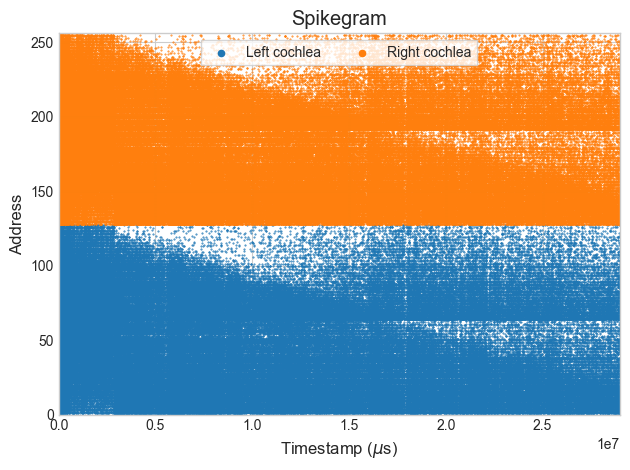

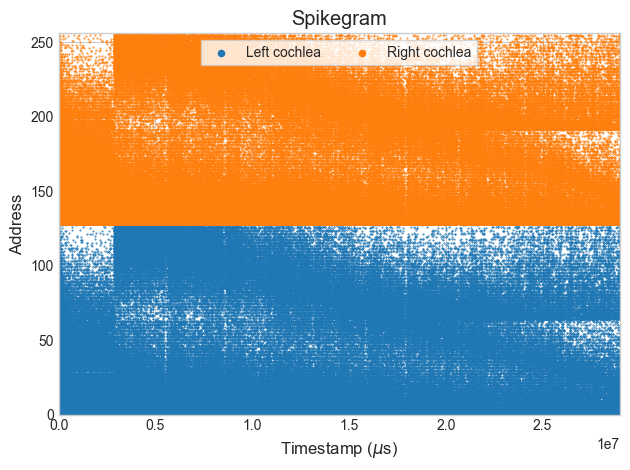

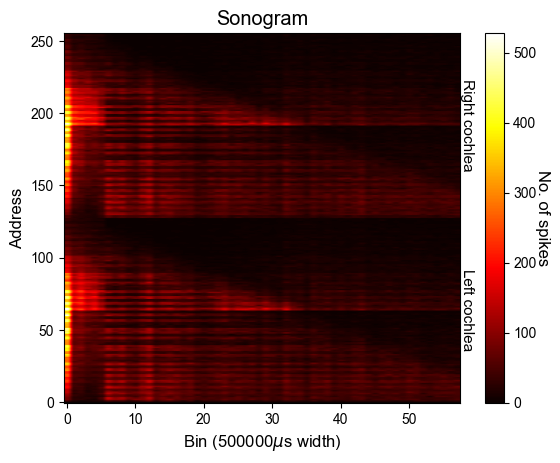

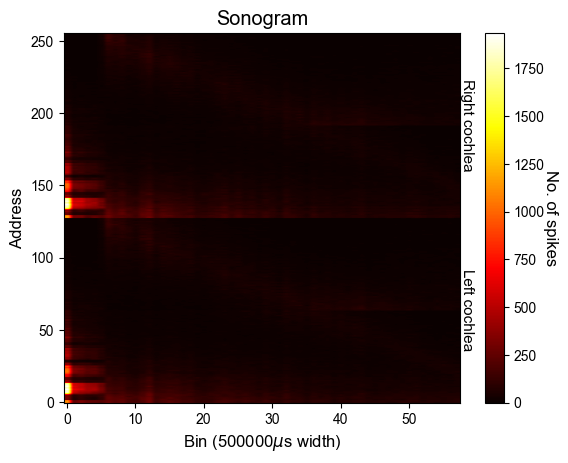

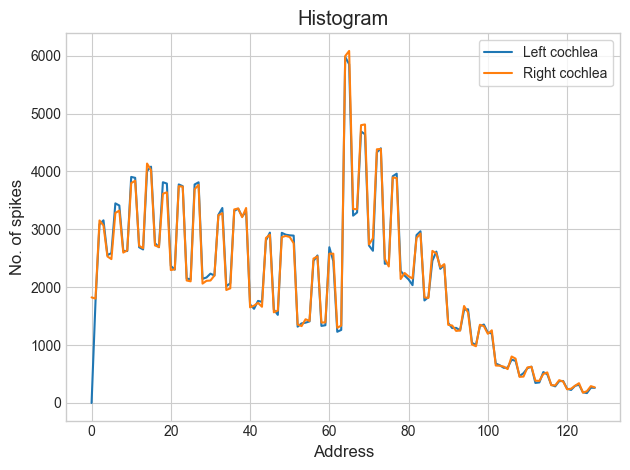

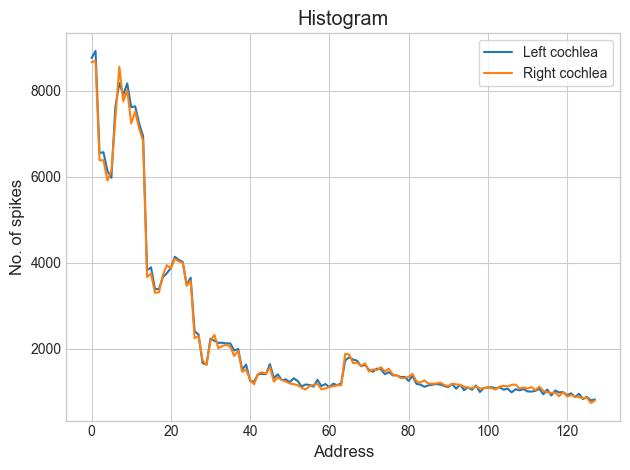

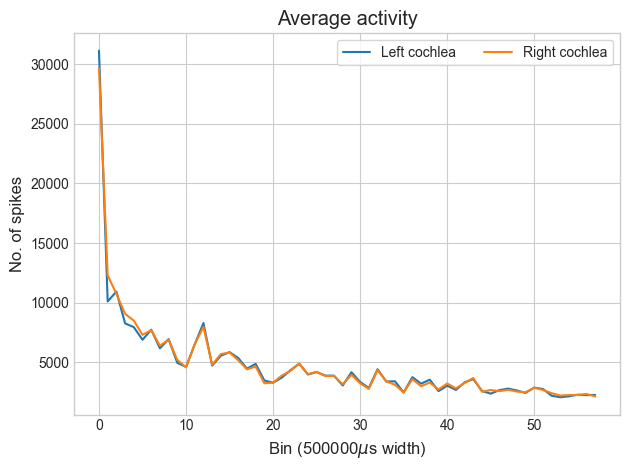

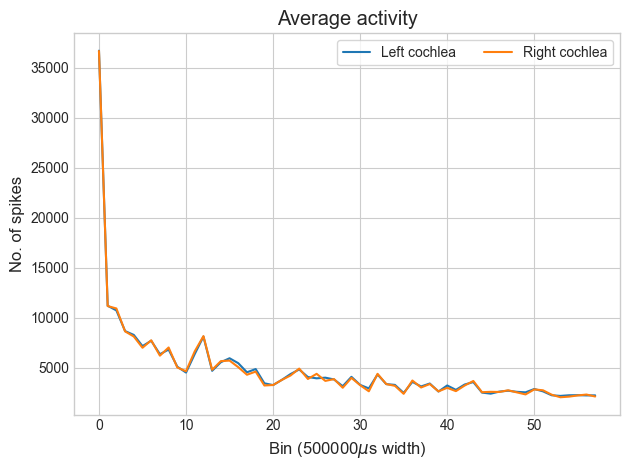

In [6]:
# Reset the OkaerTool
okaer.reset_board()

# Monitor the inputs
INPUTS = ['port_a', 'port_b']
MAX_SPIKES = 500000
DURATION = 30

# # Monitor for a specific number of spikes
# spikes = okaer.monitor(inputs=INPUTS, max_spikes=MAX_SPIKES)
# # Monitor for a specific duration
spikes = okaer.monitor(inputs=INPUTS, duration=DURATION)
# # Monitor for a specific duration or until max_spikes is reached
# spikes = okaer.monitor(inputs=INPUTS, max_spikes=MAX_SPIKES, duration=DURATION)
# # Monitor forever
# okaer.monitor_forever(inputs=INPUTS)
# time.sleep(DURATION)
# spikes = okaer.monitor_stop()

# Print the number of spikes for each input
for i in range(len(INPUTS)):
    print("Input", i, ":", spikes[i].get_num_spikes())

# Create a new pyNAVIS spike_file
okaer.logger.info("Creating spike files for all selected inputs")
spike_files = []
for i in range(len(INPUTS)):
    spike_files.append(SpikesFile(addresses=spikes[i].addresses, timestamps=spikes[i].timestamps))

okaer.logger.info("Ploting the spikegram for both NAS")
for i in range(len(spike_files)):
    Plots.spikegram(spike_files[i], settings)

okaer.logger.info("Ploting the sonogram for both NAS")
for i in range(len(spike_files)):
    # Check if the spike file is not empty
    if not (not spike_files[i].addresses):
        Plots.sonogram(spike_files[i], settings)
    else:
        okaer.logger.warning(f"Spike file {i} is empty. Skipping sonogram plot.")

okaer.logger.info("Ploting the histogram for both NAS")
for i in range(len(spike_files)):
    Plots.histogram(spike_files[i], settings)

okaer.logger.info("Ploting the average activity for both NAS")
for i in range(len(spike_files)):
    Plots.average_activity(spike_files[i], settings)
